In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [73]:
class AE():
    def __init__(self,input_data_path="../4x4matrix.csv"):
        self.p_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,0:16])
        self.q_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:,16:])
        self.model = keras.Sequential([
            keras.layers.Dense(16, activation=tf.nn.relu)
            ])
    
        self.model.compile(optimizer = 'rmsprop',
                           loss='categorical_crossentropy',
                           metrics = ['accuracy'])
        
    def fit(self):
        self.model.fit(self.q_matrix, self.p_matrix,
                      epochs = 4,
                      batch_size = 256,
                       steps_per_epoch = 1,
                      validation_data = (self.q_matrix, self.p_matrix))
    
    

In [74]:
autoencoder = AE()

/Users/shimotori/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
input_data_path="../4x4matrix.csv"

p_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:100,0:16])
q_matrix = np.array(pd.read_csv(input_data_path, index_col=0).iloc[:100,16:])
model = Sequential()
model.add( Dense(16, activation = 'relu', input_dim = 9) )
model.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
print(p_matrix.shape, q_matrix.shape)

(100, 16) (100, 9)


In [ ]:
model.fit(q_matrix, p_matrix,
          epochs = 4
         )

Epoch 1/4


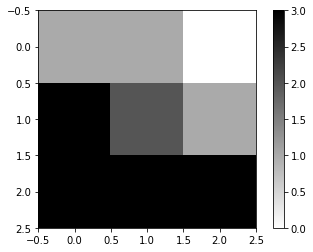

In [47]:
image = np.array(df.iloc[:,16:].iloc[53230]).reshape(3,3)
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()

In [6]:
keras.Sequential?